# Project 4

## 1. Load the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('network_backup_dataset.csv')

### (a)

In [2]:
week = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}
refined_data = list()
for i in range(len(dataset)):
    data = dataset.loc[i]
    day = (data[0]-1)*7+week[data[1]]
    if len(refined_data) == day:
        refined_data.append([0,0,0,0,0])
    workflow = int(data[3][10:])
    refined_data[day][workflow] += data[5]
refined_data = np.asarray(refined_data)

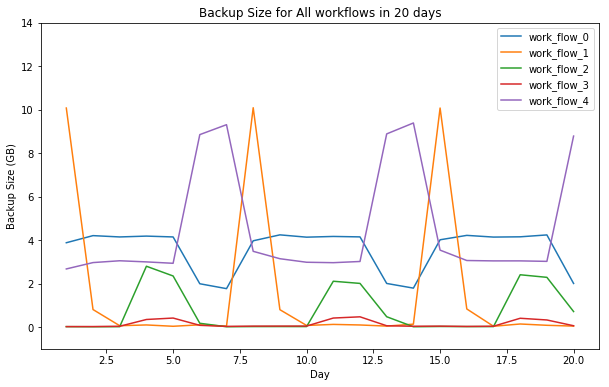

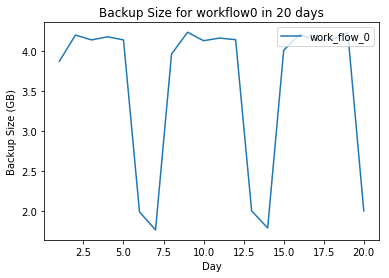

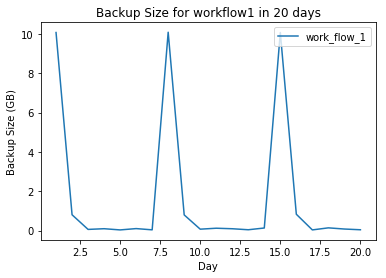

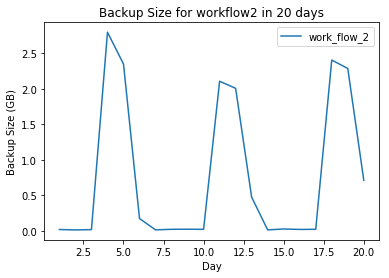

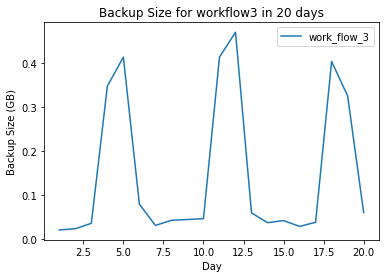

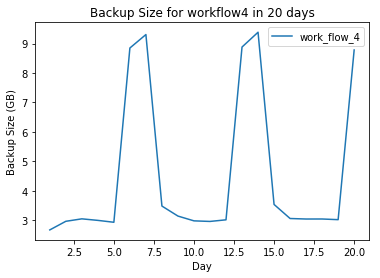

In [3]:
plt.figure(figsize=(10,6))
for workflow in range(refined_data.shape[1]):
    plt.plot(range(1,21),refined_data[0:20,workflow], label='work_flow_'+str(workflow))
plt.legend(loc="upper right")
plt.xlabel('Day')
plt.ylabel('Backup Size (GB)')
plt.title('Backup Size for All workflows in 20 days')
plt.ylim(-1,14)
plt.show()

for workflow in range(refined_data.shape[1]):
    plt.figure()
    plt.plot(range(1,21),refined_data[0:20,workflow], label='work_flow_'+str(workflow))
    plt.legend(loc="upper right")
    plt.xlabel('Day')
    plt.ylabel('Backup Size (GB)')
    plt.title('Backup Size for workflow%d in 20 days' % workflow)
    plt.show()

### (b)

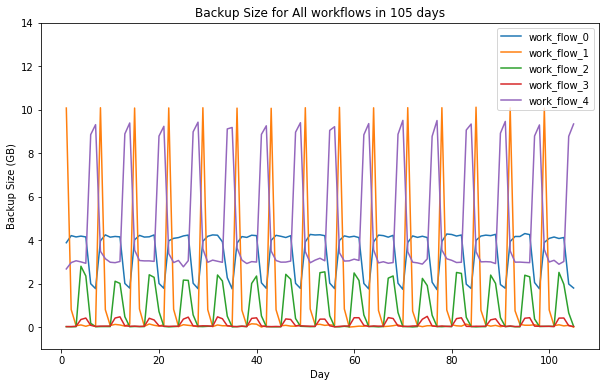

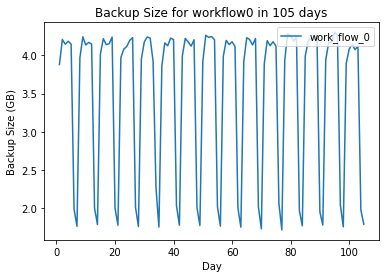

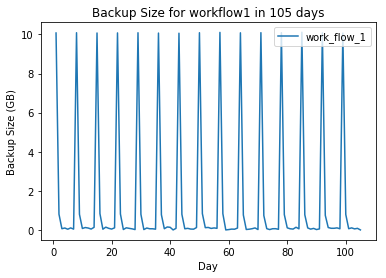

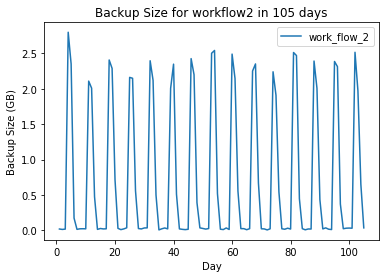

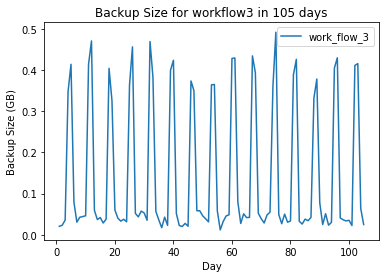

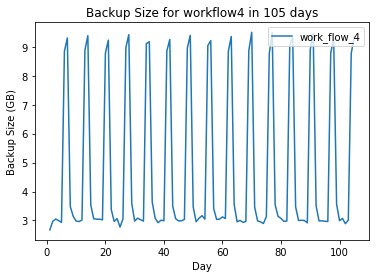

In [47]:
plt.figure(figsize=(10,6))
for workflow in range(refined_data.shape[1]):
    plt.plot(range(1,106),refined_data[:,workflow], label='work_flow_'+str(workflow))
plt.legend(loc="upper right")
plt.xlabel('Day')
plt.ylabel('Backup Size (GB)')
plt.title('Backup Size for All workflows in 105 days')
plt.ylim(-1,14)
plt.show()

for workflow in range(refined_data.shape[1]):
    plt.figure()
    plt.plot(range(1,106),refined_data[:,workflow], label='work_flow_'+str(workflow))
    plt.legend(loc="upper right")
    plt.xlabel('Day')
    plt.ylabel('Backup Size (GB)')
    plt.title('Backup Size for workflow%d in 105 days' % workflow)
    plt.show()

## 2. Predict

In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.feature_selection import f_regression, mutual_info_regression

### (a)

In [6]:
dataset = pd.read_csv('network_backup_dataset.csv')
dataset = dataset.replace({'Day of Week':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,
'Saturday':6,'Sunday':7}})
workflowdict = dict()
filedict = dict()
for wf in dataset['Work-Flow-ID']:
    workflowdict[wf] = int(wf[10:])
for f in dataset['File Name']:
    filedict[f] = int(f[5:])
dataset = dataset.replace({'Work-Flow-ID':workflowdict})
dataset = dataset.replace({'File Name':filedict})

##### i. Fit without any processing

Average training RMSE: 0.10358539364277801
Average test RMSE: 0.1036758476759903


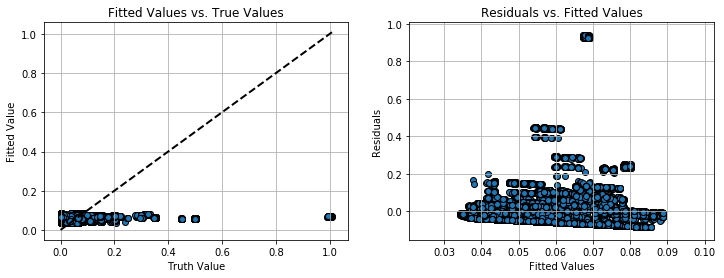

In [52]:
data = dataset.values
kf = KFold(n_splits=10)

train_mse = list()
test_mse = list()
predicted = list()
truth = list()
for train_index, test_index in kf.split(data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    data_train, data_test = data[train_index], data[test_index]
    lr = LinearRegression()
    lr.fit(data_train[:,[0,1,2,3,4]],data_train[:,5])
    train_predict = lr.predict(data_train[:,[0,1,2,3,4]])
    train_true = data_train[:,5]
    test_predict = lr.predict(data_test[:,[0,1,2,3,4]])
    test_true = data_test[:,5]
    predicted.extend(test_predict.tolist())
    truth.extend(test_true.tolist())
    #train_rmse.append(sqrt(mean_squared_error(train_true, train_predict)))
    #test_rmse.append(sqrt(mean_squared_error(test_true, test_predict)))
    train_mse.append(mean_squared_error(train_true, train_predict))
    test_mse.append(mean_squared_error(test_true, test_predict))
predicted = np.asarray(predicted)
truth = np.asarray(truth)

#for i in range(len(train_rmse)):
#    print('training RMSE:', train_rmse[i])
#    print('test RMSE:', test_rmse[i])
#print()
print('Average training RMSE:', sqrt(np.mean(train_mse)))
print('Average test RMSE:', sqrt(np.mean(test_mse)))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(truth, predicted, edgecolors=(0, 0, 0))
plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
plt.xlabel('Truth Value')
plt.ylabel('Fitted Value')
plt.title('Fitted Values vs. True Values')
plt.grid(True)
plt.subplot(1,2,2)
plt.scatter(predicted, truth-predicted, edgecolors=(0, 0, 0))
#plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

##### ii. Fit after Standardization

Average training RMSE: 0.10358539364277801
Average test RMSE: 0.1036758476759903


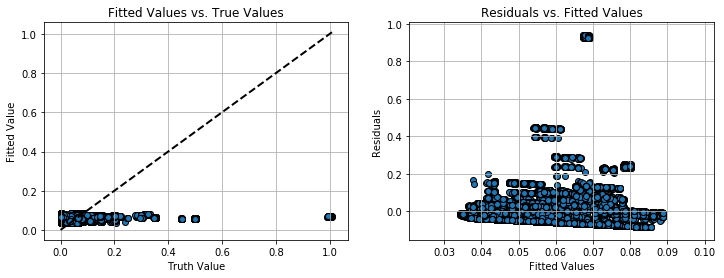

In [53]:
data = dataset.values
#data = StandardScaler().fit_transform(data)
tmp5 = data[:,5].tolist()
data = StandardScaler().fit_transform(data[:,[0,1,2,3,4]]).T.tolist()
data = np.asarray([data[0],data[1],data[2],data[3],data[4],tmp5]).T
kf = KFold(n_splits=10)

train_mse = list()
test_mse = list()
predicted = list()
truth = list()
for train_index, test_index in kf.split(data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    data_train, data_test = data[train_index], data[test_index]
    lr = LinearRegression()
    lr.fit(data_train[:,[0,1,2,3,4]],data_train[:,5])
    train_predict = lr.predict(data_train[:,[0,1,2,3,4]])
    train_true = data_train[:,5]
    test_predict = lr.predict(data_test[:,[0,1,2,3,4]])
    test_true = data_test[:,5]
    predicted.extend(test_predict.tolist())
    truth.extend(test_true.tolist())
    train_mse.append(mean_squared_error(train_true, train_predict))
    test_mse.append(mean_squared_error(test_true, test_predict))
predicted = np.asarray(predicted)
truth = np.asarray(truth)

print('Average training RMSE:', sqrt(np.mean(train_mse)))
print('Average test RMSE:', sqrt(np.mean(test_mse)))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(truth, predicted, edgecolors=(0, 0, 0))
plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
plt.xlabel('Truth Value')
plt.ylabel('Fitted Value')
plt.title('Fitted Values vs. True Values')
plt.grid(True)
plt.subplot(1,2,2)
plt.scatter(predicted, truth-predicted, edgecolors=(0, 0, 0))
#plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

##### iii. Feature Selection

In [68]:
data = dataset.values
X = data[:,[0,1,2,3,4]]
y = data[:,5]
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)
feature_name = ['Week #','Day of Week','Start Time','WorkFlowID','File Name']
for i in range(5):
    print("Feature{:d} ({}):\t  F-test={:.5f}, MI={:.5f}".format(i+1, feature_name[i], f_test[i], mi[i]))

Feature1 (Week #):	  F-test=0.00006, MI=0.00718
Feature2 (Day of Week):	  F-test=0.25750, MI=0.30175
Feature3 (Start Time):	  F-test=1.00000, MI=0.38828
Feature4 (WorkFlowID):	  F-test=0.17340, MI=1.00000
Feature5 (File Name):	  F-test=0.16797, MI=0.99286


Average training RMSE: 0.10369452819355413
Average test RMSE: 0.10377229307066825


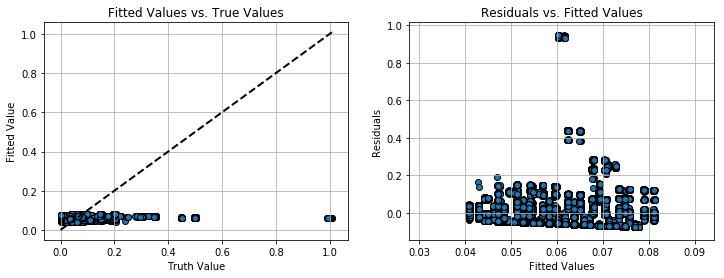

In [69]:
data = dataset.values
kf = KFold(n_splits=10)

train_mse = list()
test_mse = list()
predicted = list()
truth = list()
for train_index, test_index in kf.split(data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    data_train, data_test = data[train_index], data[test_index]
    lr = LinearRegression()
    lr.fit(data_train[:,[2,3,4]],data_train[:,5])
    train_predict = lr.predict(data_train[:,[2,3,4]])
    train_true = data_train[:,5]
    test_predict = lr.predict(data_test[:,[2,3,4]])
    test_true = data_test[:,5]
    predicted.extend(test_predict.tolist())
    truth.extend(test_true.tolist())
    train_mse.append(mean_squared_error(train_true, train_predict))
    test_mse.append(mean_squared_error(test_true, test_predict))
predicted = np.asarray(predicted)
truth = np.asarray(truth)

print('Average training RMSE:', sqrt(np.mean(train_mse)))
print('Average test RMSE:', sqrt(np.mean(test_mse)))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(truth, predicted, edgecolors=(0, 0, 0))
plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
plt.xlabel('Truth Value')
plt.ylabel('Fitted Value')
plt.title('Fitted Values vs. True Values')
plt.grid(True)
plt.subplot(1,2,2)
plt.scatter(predicted, truth-predicted, edgecolors=(0, 0, 0))
#plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

##### iv. Feature Encoding

In [25]:
def regression(data, model='linear', alpha=1, l1_ratio=0.5):
    kf = KFold(n_splits=10)
    train_mse = list()
    test_mse = list()
    predicted = list()
    truth = list()
    index = data.shape[1]-1
    for train_index, test_index in kf.split(data):
        #print("TRAIN:", train_index, "TEST:", test_index)
        data_train, data_test = data[train_index], data[test_index]
        if model == 'Ridge':
            lr = Ridge(alpha=alpha)
        elif model == 'Lasso':
            lr = Lasso(alpha=alpha)
        elif model == 'ElasticNet':
            lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elif model == 'linear':
            lr = LinearRegression()
        lr.fit(data_train[:,0:index],data_train[:,index])
        train_predict = lr.predict(data_train[:,0:index])
        train_true = data_train[:,index]
        test_predict = lr.predict(data_test[:,0:index])
        test_true = data_test[:,index]
        predicted.extend(test_predict.tolist())
        truth.extend(test_true.tolist())
        train_mse.append(mean_squared_error(train_true, train_predict))
        test_mse.append(mean_squared_error(test_true, test_predict))
    predicted = np.asarray(predicted)
    truth = np.asarray(truth)
    #print('Average training RMSE:', np.mean(train_rmse))
    #print('Average test RMSE:', np.mean(test_rmse))
    return sqrt(np.mean(train_mse)), sqrt(np.mean(test_mse))

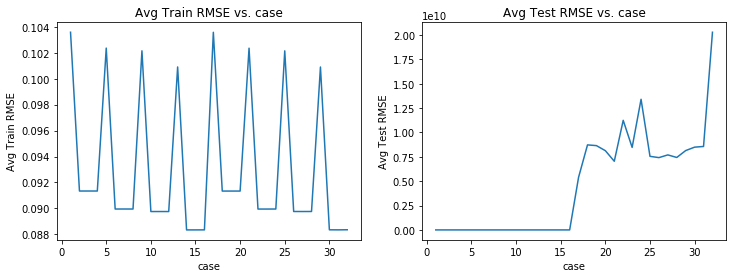

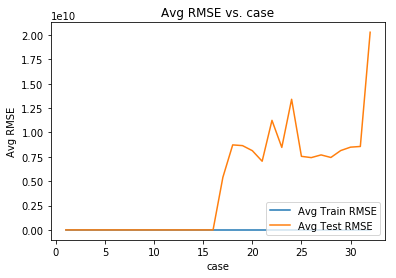

Minimum Train RMSE is 0.08833732602898674 at index 13
Minimum Test RMSE is 0.08850438637220652 at index 14
best case: index 14
Combination: 01110, scalar|onehot|onehot|onehot|scalar
----------------------------------------------
Average training RMSE: 0.08833837427395831
Average test RMSE: 0.08850438672956973


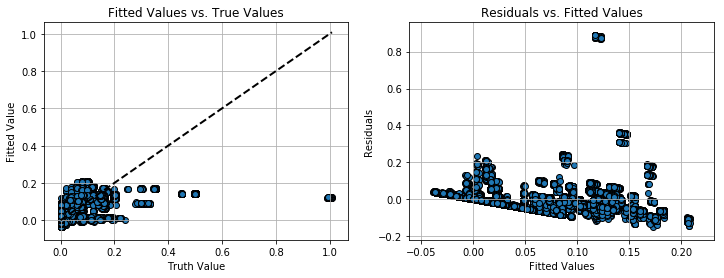

In [78]:
data_scalar = dataset.values[:,0:6]
data_onehot = list()
for i in range(5):
    #data_onehot.append(OneHotEncoder(categorical_features=[i],sparse=False).fit_transform(data_scalar[:,0:5]))
    data_onehot.append(OneHotEncoder(sparse=False).fit_transform(data_scalar[:,i].reshape(-1,1)))
ds = [[[data_scalar[:,0].tolist()],data_onehot[0].T.tolist()],[[data_scalar[:,1].tolist()],data_onehot[1].T.tolist()],
      [[data_scalar[:,2].tolist()],data_onehot[2].T.tolist()],[[data_scalar[:,3].tolist()],data_onehot[3].T.tolist()],
      [[data_scalar[:,4].tolist()],data_onehot[4].T.tolist()]]
#for i in range(5):
#    print(data_onehot[i].shape)
#print('------------------------')
truesize = [data_scalar[:,5].tolist()]
train_rmses = list()
test_rmses = list()
for a in range(2):
    for b in range(2):
        for c in range(2):
            for d in range(2):
                for e in range(2):
                    x = ds[0][a].copy()
                    x.extend(ds[1][b])
                    x.extend(ds[2][c])
                    x.extend(ds[3][d])
                    x.extend(ds[4][e])
                    x.extend(truesize)
                    x = np.asarray(x).T
                    #print(x.shape)
                    train_rmse,test_rmse = regression(x,model='linear')
                    train_rmses.append(train_rmse)
                    test_rmses.append(test_rmse)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Avg Train RMSE vs. case")
plt.ylabel("Avg Train RMSE")
plt.xlabel("case")
plt.plot(range(1,len(train_rmses)+1), train_rmses, label='Avg Train RMSE')
plt.subplot(1,2,2)
plt.title("Avg Test RMSE vs. case")
plt.ylabel("Avg Test RMSE")
plt.xlabel("case")
plt.plot(range(1,len(test_rmses)+1), test_rmses, label='Avg Test RMSE')
plt.show()

plt.figure(figsize=(6,4))
plt.title("Avg RMSE vs. case")
plt.ylabel("Avg RMSE")
plt.xlabel("case")
plt.plot(range(1,len(train_rmses)+1), train_rmses, label='Avg Train RMSE')
plt.plot(range(1,len(test_rmses)+1), test_rmses, label='Avg Test RMSE')
plt.legend(loc='lower right')
plt.show()

print('Minimum Train RMSE is', min(train_rmses), 'at index', train_rmses.index(min(train_rmses)))
print('Minimum Test RMSE is', min(test_rmses), 'at index', test_rmses.index(min(test_rmses)))
print('best case: index', test_rmses.index(min(test_rmses)))
print('Combination: 01110, scalar|onehot|onehot|onehot|scalar')


x = ds[0][0].copy()
x.extend(ds[1][1])
x.extend(ds[2][1])
x.extend(ds[3][1])
x.extend(ds[4][0])
x.extend(truesize)
data = np.asarray(x).T
kf = KFold(n_splits=10)
train_mse = list()
test_mse = list()
predicted = list()
truth = list()
index = data.shape[1]-1
for train_index, test_index in kf.split(data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    data_train, data_test = data[train_index], data[test_index]
    lr = LinearRegression()
    lr.fit(data_train[:,0:index],data_train[:,index])
    train_predict = lr.predict(data_train[:,0:index])
    train_true = data_train[:,index]
    test_predict = lr.predict(data_test[:,0:index])
    test_true = data_test[:,index]
    predicted.extend(test_predict.tolist())
    truth.extend(test_true.tolist())
    train_mse.append(mean_squared_error(train_true, train_predict))
    test_mse.append(mean_squared_error(test_true, test_predict))
predicted = np.asarray(predicted)
truth = np.asarray(truth)
print('----------------------------------------------')
print('Average training RMSE:', sqrt(np.mean(train_mse)))
print('Average test RMSE:', sqrt(np.mean(test_mse)))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(truth, predicted, edgecolors=(0, 0, 0))
plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
plt.xlabel('Truth Value')
plt.ylabel('Fitted Value')
plt.title('Fitted Values vs. True Values')
plt.grid(True)
plt.subplot(1,2,2)
plt.scatter(predicted, truth-predicted, edgecolors=(0, 0, 0))
#plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

##### v. Controlling ill-conditioning and over-fiting

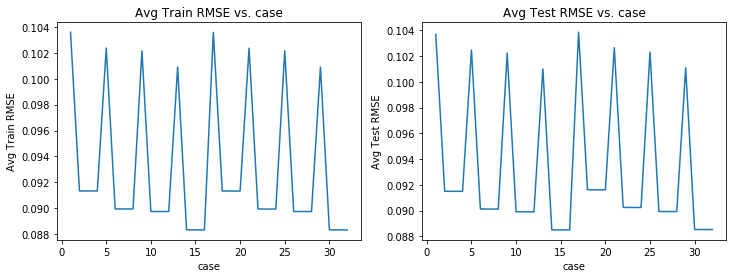

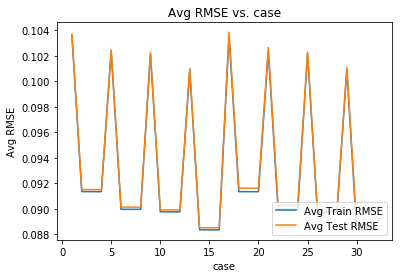

Minimum Train RMSE is 0.08833509560395517 at index 31
Minimum Test RMSE is 0.088503990820505 at index 14
best case: index 14
Combination: 01110, scalar|onehot|onehot|onehot|scalar
----------------------------------------------
Average training RMSE: 0.0883377153893992
Average test RMSE: 0.088503990820505


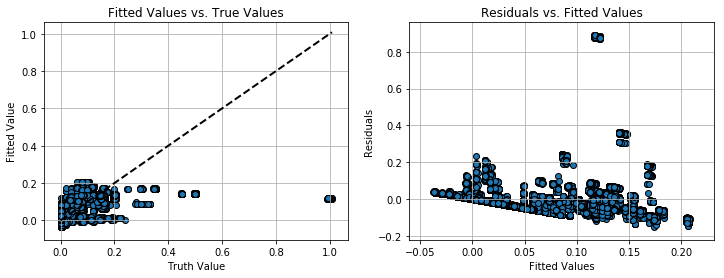

In [72]:
#Ridge Regularizer
alpha_ridge = 12
data_scalar = dataset.values[:,0:6]
data_onehot = list()
for i in range(5):
    #data_onehot.append(OneHotEncoder(categorical_features=[i],sparse=False).fit_transform(data_scalar[:,0:5]))
    data_onehot.append(OneHotEncoder(sparse=False).fit_transform(data_scalar[:,i].reshape(-1,1)))
ds = [[[data_scalar[:,0].tolist()],data_onehot[0].T.tolist()],[[data_scalar[:,1].tolist()],data_onehot[1].T.tolist()],
      [[data_scalar[:,2].tolist()],data_onehot[2].T.tolist()],[[data_scalar[:,3].tolist()],data_onehot[3].T.tolist()],
      [[data_scalar[:,4].tolist()],data_onehot[4].T.tolist()]]
#for i in range(5):
#    print(data_onehot[i].shape)
#print('------------------------')
truesize = [data_scalar[:,5].tolist()]
train_rmses = list()
test_rmses = list()
for a in range(2):
    for b in range(2):
        for c in range(2):
            for d in range(2):
                for e in range(2):
                    x = ds[0][a].copy()
                    x.extend(ds[1][b])
                    x.extend(ds[2][c])
                    x.extend(ds[3][d])
                    x.extend(ds[4][e])
                    x.extend(truesize)
                    x = np.asarray(x).T
                    #print(x.shape)
                    train_rmse,test_rmse = regression(x,model='Ridge',alpha=alpha_ridge)
                    train_rmses.append(train_rmse)
                    test_rmses.append(test_rmse)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Avg Train RMSE vs. case")
plt.ylabel("Avg Train RMSE")
plt.xlabel("case")
plt.plot(range(1,len(train_rmses)+1), train_rmses, label='Avg Train RMSE')
plt.subplot(1,2,2)
plt.title("Avg Test RMSE vs. case")
plt.ylabel("Avg Test RMSE")
plt.xlabel("case")
plt.plot(range(1,len(test_rmses)+1), test_rmses, label='Avg Test RMSE')
plt.show()

plt.figure(figsize=(6,4))
plt.title("Avg RMSE vs. case")
plt.ylabel("Avg RMSE")
plt.xlabel("case")
plt.plot(range(1,len(train_rmses)+1), train_rmses, label='Avg Train RMSE')
plt.plot(range(1,len(test_rmses)+1), test_rmses, label='Avg Test RMSE')
plt.legend(loc='lower right')
plt.show()

print('Minimum Train RMSE is', min(train_rmses), 'at index', train_rmses.index(min(train_rmses)))
print('Minimum Test RMSE is', min(test_rmses), 'at index', test_rmses.index(min(test_rmses)))
print('best case: index', test_rmses.index(min(test_rmses)))
print('Combination: 01110, scalar|onehot|onehot|onehot|scalar')

x = ds[0][0].copy()
x.extend(ds[1][1])
x.extend(ds[2][1])
x.extend(ds[3][1])
x.extend(ds[4][0])
x.extend(truesize)
data = np.asarray(x).T
kf = KFold(n_splits=10)
train_mse = list()
test_mse = list()
predicted = list()
truth = list()
index = data.shape[1]-1
for train_index, test_index in kf.split(data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    data_train, data_test = data[train_index], data[test_index]
    lr = Ridge(alpha=alpha_ridge)
    lr.fit(data_train[:,0:index],data_train[:,index])
    train_predict = lr.predict(data_train[:,0:index])
    train_true = data_train[:,index]
    test_predict = lr.predict(data_test[:,0:index])
    test_true = data_test[:,index]
    predicted.extend(test_predict.tolist())
    truth.extend(test_true.tolist())
    train_mse.append(mean_squared_error(train_true, train_predict))
    test_mse.append(mean_squared_error(test_true, test_predict))
predicted = np.asarray(predicted)
truth = np.asarray(truth)
print('----------------------------------------------')
print('Average training RMSE:', sqrt(np.mean(train_mse)))
print('Average test RMSE:', sqrt(np.mean(test_mse)))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(truth, predicted, edgecolors=(0, 0, 0))
plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
plt.xlabel('Truth Value')
plt.ylabel('Fitted Value')
plt.title('Fitted Values vs. True Values')
plt.grid(True)
plt.subplot(1,2,2)
plt.scatter(predicted, truth-predicted, edgecolors=(0, 0, 0))
#plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

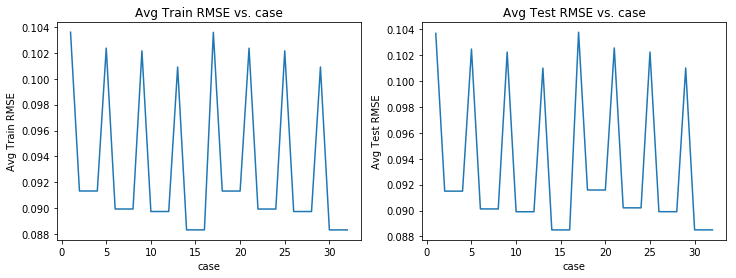

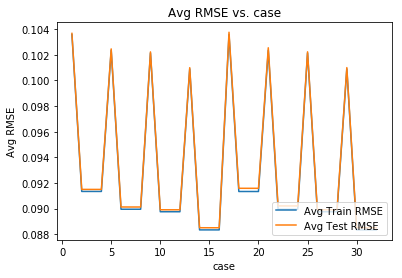

Minimum Train RMSE is 0.08833570788509812 at index 31
Minimum Test RMSE is 0.08850437612625646 at index 14
best case: index 14
Combination: 01110, scalar|onehot|onehot|onehot|scalar
----------------------------------------------
Average training RMSE: 0.08833759236962922
Average test RMSE: 0.08850437612625646


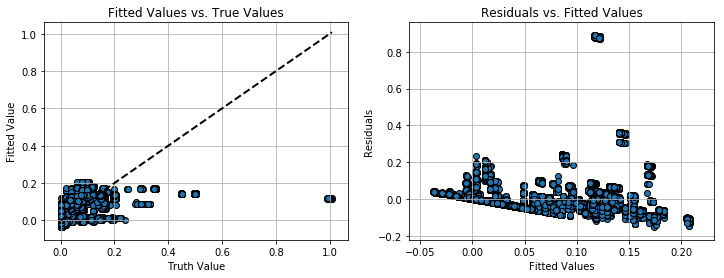

In [74]:
#Lasso Regularizer
alpha_lasso = 0.000015
data_scalar = dataset.values[:,0:6]
data_onehot = list()
for i in range(5):
    #data_onehot.append(OneHotEncoder(categorical_features=[i],sparse=False).fit_transform(data_scalar[:,0:5]))
    data_onehot.append(OneHotEncoder(sparse=False).fit_transform(data_scalar[:,i].reshape(-1,1)))
ds = [[[data_scalar[:,0].tolist()],data_onehot[0].T.tolist()],[[data_scalar[:,1].tolist()],data_onehot[1].T.tolist()],
      [[data_scalar[:,2].tolist()],data_onehot[2].T.tolist()],[[data_scalar[:,3].tolist()],data_onehot[3].T.tolist()],
      [[data_scalar[:,4].tolist()],data_onehot[4].T.tolist()]]
#for i in range(5):
#    print(data_onehot[i].shape)
#print('------------------------')
truesize = [data_scalar[:,5].tolist()]
train_rmses = list()
test_rmses = list()
for a in range(2):
    for b in range(2):
        for c in range(2):
            for d in range(2):
                for e in range(2):
                    x = ds[0][a].copy()
                    x.extend(ds[1][b])
                    x.extend(ds[2][c])
                    x.extend(ds[3][d])
                    x.extend(ds[4][e])
                    x.extend(truesize)
                    x = np.asarray(x).T
                    #print(x.shape)
                    train_rmse,test_rmse = regression(x,model='Lasso',alpha=alpha_lasso)
                    train_rmses.append(train_rmse)
                    test_rmses.append(test_rmse)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Avg Train RMSE vs. case")
plt.ylabel("Avg Train RMSE")
plt.xlabel("case")
plt.plot(range(1,len(train_rmses)+1), train_rmses, label='Avg Train RMSE')
plt.subplot(1,2,2)
plt.title("Avg Test RMSE vs. case")
plt.ylabel("Avg Test RMSE")
plt.xlabel("case")
plt.plot(range(1,len(test_rmses)+1), test_rmses, label='Avg Test RMSE')
plt.show()

plt.figure(figsize=(6,4))
plt.title("Avg RMSE vs. case")
plt.ylabel("Avg RMSE")
plt.xlabel("case")
plt.plot(range(1,len(train_rmses)+1), train_rmses, label='Avg Train RMSE')
plt.plot(range(1,len(test_rmses)+1), test_rmses, label='Avg Test RMSE')
plt.legend(loc='lower right')
plt.show()

print('Minimum Train RMSE is', min(train_rmses), 'at index', train_rmses.index(min(train_rmses)))
print('Minimum Test RMSE is', min(test_rmses), 'at index', test_rmses.index(min(test_rmses)))
print('best case: index', test_rmses.index(min(test_rmses)))
print('Combination: 01110, scalar|onehot|onehot|onehot|scalar')

x = ds[0][0].copy()
x.extend(ds[1][1])
x.extend(ds[2][1])
x.extend(ds[3][1])
x.extend(ds[4][0])
x.extend(truesize)
data = np.asarray(x).T
kf = KFold(n_splits=10)
train_mse = list()
test_mse = list()
predicted = list()
truth = list()
index = data.shape[1]-1
for train_index, test_index in kf.split(data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    data_train, data_test = data[train_index], data[test_index]
    lr = Lasso(alpha=alpha_lasso)
    lr.fit(data_train[:,0:index],data_train[:,index])
    train_predict = lr.predict(data_train[:,0:index])
    train_true = data_train[:,index]
    test_predict = lr.predict(data_test[:,0:index])
    test_true = data_test[:,index]
    predicted.extend(test_predict.tolist())
    truth.extend(test_true.tolist())
    train_mse.append(mean_squared_error(train_true, train_predict))
    test_mse.append(mean_squared_error(test_true, test_predict))
predicted = np.asarray(predicted)
truth = np.asarray(truth)
print('----------------------------------------------')
print('Average training RMSE:', sqrt(np.mean(train_mse)))
print('Average test RMSE:', sqrt(np.mean(test_mse)))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(truth, predicted, edgecolors=(0, 0, 0))
plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
plt.xlabel('Truth Value')
plt.ylabel('Fitted Value')
plt.title('Fitted Values vs. True Values')
plt.grid(True)
plt.subplot(1,2,2)
plt.scatter(predicted, truth-predicted, edgecolors=(0, 0, 0))
#plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

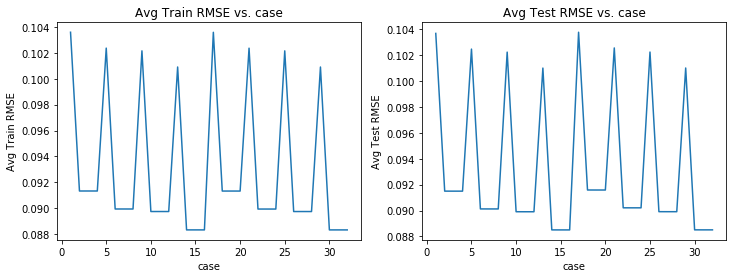

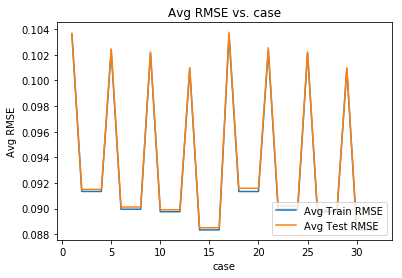

Minimum Train RMSE is 0.08833555355045793 at index 31
Minimum Test RMSE is 0.08850435959342434 at index 14
best case: index 14
Combination: 01110, scalar|onehot|onehot|onehot|scalar
----------------------------------------------
Average training RMSE: 0.08833755660346942
Average test RMSE: 0.08850435959342434


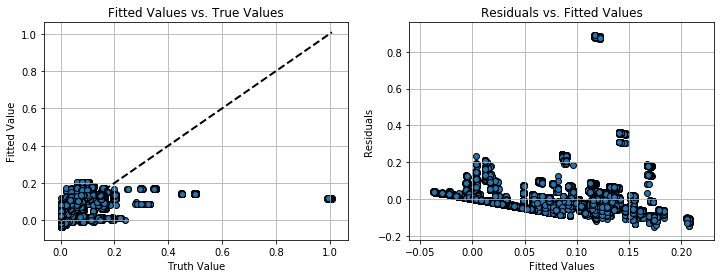

In [86]:
#Elastic Net Regularizer
alpha_elastic = 0.00001
l1_ratio = 1.3
data_scalar = dataset.values[:,0:6]
data_onehot = list()
for i in range(5):
    #data_onehot.append(OneHotEncoder(categorical_features=[i],sparse=False).fit_transform(data_scalar[:,0:5]))
    data_onehot.append(OneHotEncoder(sparse=False).fit_transform(data_scalar[:,i].reshape(-1,1)))
ds = [[[data_scalar[:,0].tolist()],data_onehot[0].T.tolist()],[[data_scalar[:,1].tolist()],data_onehot[1].T.tolist()],
      [[data_scalar[:,2].tolist()],data_onehot[2].T.tolist()],[[data_scalar[:,3].tolist()],data_onehot[3].T.tolist()],
      [[data_scalar[:,4].tolist()],data_onehot[4].T.tolist()]]
#for i in range(5):
#    print(data_onehot[i].shape)
#print('------------------------')
truesize = [data_scalar[:,5].tolist()]
train_rmses = list()
test_rmses = list()
for a in range(2):
    for b in range(2):
        for c in range(2):
            for d in range(2):
                for e in range(2):
                    x = ds[0][a].copy()
                    x.extend(ds[1][b])
                    x.extend(ds[2][c])
                    x.extend(ds[3][d])
                    x.extend(ds[4][e])
                    x.extend(truesize)
                    x = np.asarray(x).T
                    #print(x.shape)
                    train_rmse,test_rmse = regression(x,model='ElasticNet',alpha=alpha_elastic,l1_ratio=l1_ratio)
                    train_rmses.append(train_rmse)
                    test_rmses.append(test_rmse)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Avg Train RMSE vs. case")
plt.ylabel("Avg Train RMSE")
plt.xlabel("case")
plt.plot(range(1,len(train_rmses)+1), train_rmses, label='Avg Train RMSE')
plt.subplot(1,2,2)
plt.title("Avg Test RMSE vs. case")
plt.ylabel("Avg Test RMSE")
plt.xlabel("case")
plt.plot(range(1,len(test_rmses)+1), test_rmses, label='Avg Test RMSE')
plt.show()

plt.figure(figsize=(6,4))
plt.title("Avg RMSE vs. case")
plt.ylabel("Avg RMSE")
plt.xlabel("case")
plt.plot(range(1,len(train_rmses)+1), train_rmses, label='Avg Train RMSE')
plt.plot(range(1,len(test_rmses)+1), test_rmses, label='Avg Test RMSE')
plt.legend(loc='lower right')
plt.show()

print('Minimum Train RMSE is', min(train_rmses), 'at index', train_rmses.index(min(train_rmses)))
print('Minimum Test RMSE is', min(test_rmses), 'at index', test_rmses.index(min(test_rmses)))
print('best case: index', test_rmses.index(min(test_rmses)))
print('Combination: 01110, scalar|onehot|onehot|onehot|scalar')

x = ds[0][0].copy()
x.extend(ds[1][1])
x.extend(ds[2][1])
x.extend(ds[3][1])
x.extend(ds[4][0])
x.extend(truesize)
data = np.asarray(x).T
kf = KFold(n_splits=10)
train_mse = list()
test_mse = list()
predicted = list()
truth = list()
index = data.shape[1]-1
for train_index, test_index in kf.split(data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    data_train, data_test = data[train_index], data[test_index]
    lr = ElasticNet(alpha=alpha_elastic,l1_ratio=l1_ratio)
    lr.fit(data_train[:,0:index],data_train[:,index])
    train_predict = lr.predict(data_train[:,0:index])
    train_true = data_train[:,index]
    test_predict = lr.predict(data_test[:,0:index])
    test_true = data_test[:,index]
    predicted.extend(test_predict.tolist())
    truth.extend(test_true.tolist())
    train_mse.append(mean_squared_error(train_true, train_predict))
    test_mse.append(mean_squared_error(test_true, test_predict))
predicted = np.asarray(predicted)
truth = np.asarray(truth)
print('----------------------------------------------')
print('Average training RMSE:', sqrt(np.mean(train_mse)))
print('Average test RMSE:', sqrt(np.mean(test_mse)))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(truth, predicted, edgecolors=(0, 0, 0))
plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
plt.xlabel('Truth Value')
plt.ylabel('Fitted Value')
plt.title('Fitted Values vs. True Values')
plt.grid(True)
plt.subplot(1,2,2)
plt.scatter(predicted, truth-predicted, edgecolors=(0, 0, 0))
#plt.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()